In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pylab as pylab
import pandas as pd
from operator import itemgetter

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc



pylab.rcParams['figure.figsize'] = 10, 10
plt.rc("font", size=23)


plt.rc('xtick', color='k', labelsize='medium', direction='in')
plt.rc('xtick.major', size=8, pad=12)
plt.rc('xtick.minor', size=8, pad=12)

plt.rc('ytick', color='k', labelsize='medium', direction='in')
plt.rc('ytick.major', size=8, pad=12)
plt.rc('ytick.minor', size=8, pad=12)

# Exercise : logistic regression

In [2]:
df_heart=pd.read_csv('framingham.csv')
#df_heart.replace(np.nan,"NaN")
df_heart.dropna(axis=0,inplace=True)

df_heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Implement a logistic regression pipeline to predict the column `'TenYearCHD'` (dependent variable) by adapting some of the code above.

Assess the accuracy and AUC_ROC of your model, and list the features by order of their importance.


fraction of class benign in train 0.15238789646372586 fraction of class benign in test 0.15191256830601094 fraction of class benign in full 0.15226899945325315
Grid best parameter (max.roc_auc):  {'model__C': 0.01519911082952933, 'model__penalty': 'l2', 'model__solver': 'liblinear'}
Grid best score (roc_auc):  0.7236646123665167
Grid best parameter (max.roc_auc) model on test:  0.7515760587406364
confusion matrix
[[530 246]
 [ 43  96]]
              precision    recall  f1-score   support

           0       0.92      0.68      0.79       776
           1       0.28      0.69      0.40       139

    accuracy                           0.68       915
   macro avg       0.60      0.69      0.59       915
weighted avg       0.83      0.68      0.73       915

0.7515760587406364


C:\Users\sebas\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:102: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


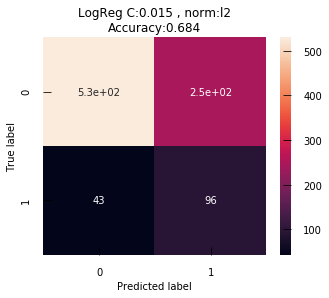

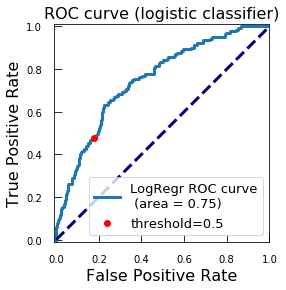

Features sorted per importance in discriminative process
[['age', 0.34089930998132295], ['sysBP', 0.22633383491010958], ['male', 0.16419142391550173], ['cigsPerDay', 0.1432449117630901], ['glucose', 0.1389075983396515], ['prevalentHyp', 0.12227026249686242], ['totChol', 0.08977423713028086], ['education', 0.0742762700485203], ['BPMeds', 0.05762154533174381], ['currentSmoker', 0.04489020449588619], ['prevalentStroke', 0.030893124712993405], ['heartRate', 0.029712704380863177], ['diaBP', 0.0248791774915342], ['BMI', 0.012558825706345785], ['diabetes', 0.005984483812603124]]


In [5]:
X_heart=np.array(df_heart[list(df_heart.columns)[:-1]])
y_heart=np.array(df_heart[list(df_heart.columns)[-1]])

X_train, X_test, y_train, y_test = train_test_split(X_heart,y_heart,
                                                   random_state=0,stratify=y_heart)
#stratify is here to make sure that you split keeping the repartition of labels unaffected

print("fraction of class benign in train",sum(y_train)/len(y_train),"fraction of class benign in test",sum(y_test)/len(y_test),"fraction of class benign in full",sum(y_heart)/len(y_heart))


sco='roc_auc'
#sco='accuracy'

from sklearn.pipeline import Pipeline

#create your logistic regression object, the class being slightly unbalanced add a class weight
logi_r=LogisticRegression(class_weight='balanced')



#put it in a pipeline : the pipeline allows you to put tasks to perfom in a sequential manner.
#Here particularly to scale subset of your data at a time when you will use the cross
#validation technic. By doing the scaling on each subset that is going for validation instead of 
#on the full training set
#you make sure that information about your test and validation are not leaking in your training.
#Scaling is important for some optimizers, generally speaking for technics other than logistic
#regression or decision tree, when you add a Lasso or Ridge regularization,
#when dealing with covariables that have a variety of scales, and finally I believe make model intepretation easier.

pipeline_lr=Pipeline([('scalar',StandardScaler()),('model',logi_r)])

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

grid_values = {'model__C': np.logspace(-5,2,100),'model__penalty':['l1','l2'],'model__solver':['liblinear']}
# define the hyperparameters you want to test
#with the range over which you want it to be tested. Note the model double underscore name of the parameters.

grid_lr_acc = GridSearchCV(pipeline_lr, param_grid = grid_values, scoring=sco,n_jobs=-1)#Feed it to the GridSearchCV with the right
#score(here sc) over which the decision should be taken

grid_lr_acc.fit(X_train, y_train)#train your pipeline

y_decision_fn_scores_acc=grid_lr_acc.score(X_test,y_test)# calculate the score of your trained pipeline on the test

print('Grid best parameter (max.'+sco+'): ', grid_lr_acc.best_params_)#get the best parameters
print('Grid best score ('+sco+'): ', grid_lr_acc.best_score_)#get the best score calculated from the train/validation
#dataset
print('Grid best parameter (max.'+sco+') model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric



from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

y_pred_test_c=grid_lr_acc.predict(X_test)#predict y_test from X_test thanks to your trained model

confusion_mc_c = confusion_matrix(y_test, y_pred_test_c)# check the number of mistake made with the default 
#threshold for your decision function
print("confusion matrix")
print(confusion_mc_c)
df_cm_c = pd.DataFrame(confusion_mc_c, 
                     index = [i for i in range(2)], columns = [i for i in range(2)])

plt.figure(figsize=(5,4))
sns.heatmap(df_cm_c, annot=True)
plt.title('LogReg C:'+str(grid_lr_acc.best_params_['model__C'])[:5]
          +' , norm:'+grid_lr_acc.best_params_['model__penalty']+'\nAccuracy:{0:.3f}'.format(accuracy_score(y_test, 
                                                                       y_pred_test_c)))
plt.ylabel('True label')
plt.xlabel('Predicted label')

print(classification_report(y_test, y_pred_test_c))# check the overall capacity of your model on test set 
#according to a bunch of metric


import scipy as sc
# this three lines here are how you get the area under the ROC curve score which is very important for evaluating your model
y_score_lr_c = grid_lr_acc.decision_function(X_test)#decision_function gives you the proba for a point to be in
# a class
fpr_lr_c, tpr_lr_c, thre = roc_curve(y_test, y_score_lr_c)# this calculates the ROC curve
roc_auc_lr_c = auc(fpr_lr_c, tpr_lr_c)#finally this calculates the area under the curve
print(roc_auc_lr_c)
proba=sc.special.expit(thre)
for i in range(len(proba)):
    if abs(proba[i]-0.5)<0.1:
        keep=i
        break
        

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr_c, tpr_lr_c, lw=3, label='LogRegr ROC curve\n (area = {:0.2f})'.format(roc_auc_lr_c))
plt.plot(fpr_lr_c[keep], tpr_lr_c[keep],'ro',label='threshold=0.5')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (logistic classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

lr = LogisticRegression(penalty=grid_lr_acc.best_params_['model__penalty'],C=grid_lr_acc.best_params_['model__C'],
                       solver=grid_lr_acc.best_params_['model__solver'])
lr.fit(X_train_scaled, y_train)
w=lr.coef_[0]#get the weights

sorted_features=sorted([[list(df_heart.columns)[i],abs(w[i])] for i in range(len(w))],key=itemgetter(1),reverse=True)

print('Features sorted per importance in discriminative process')
print(sorted_features)

# Regression exercise : predicting daily maximal temperature


https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

## Not thinking too much

In [6]:
# Read in data as pandas dataframe and display first 5 rows
features = pd.read_csv('One_hot_temp.csv')
features.head(5)

,Unnamed: 0,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [7]:
features.columns

Index(['Unnamed: 0', 'year', 'month', 'day', 'temp_2', 'temp_1', 'average',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'],
      dtype='object')

In [8]:
from sklearn.ensemble import RandomForestRegressor

y = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop(['Unnamed: 0', 'year', 'month', 'day',
       'actual', 
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                                           random_state = 42)

grid_values = {'criterion': ['mse'],
               'n_estimators':np.arange(600,1200,300), 
               'max_depth':np.arange(2,22,5),
               'min_samples_split':np.arange(2,20,4),
              'min_samples_leaf':np.arange(1,20,4)}# define the hyperparameters you want to test
#with the range over which you want it to be tested.

grid_tree_acc = GridSearchCV(RandomForestRegressor(), param_grid = grid_values, scoring='r2',n_jobs=-1)#Feed it to the GridSearchCV with the right
#score over which the decision should be taken

grid_tree_acc.fit(X_train, y_train)

y_decision_fn_scores_acc=grid_tree_acc.score(X_test,y_test)

print('Grid best parameter (max. r2): ', grid_tree_acc.best_params_)#get the best parameters
print('Grid best score (r2): ', grid_tree_acc.best_score_)#get the best score calculated from the train/validation
#dataset
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric

Grid best parameter (max. r2):  {'criterion': 'mse', 'max_depth': 12, 'min_samples_leaf': 13, 'min_samples_split': 14, 'n_estimators': 900}
Grid best score (r2):  0.8227945183056727
Grid best parameter (max. r2) model on test:  0.8312623308932362


In [9]:
RF = RandomForestRegressor(criterion=grid_tree_acc.best_params_['criterion'],
                              n_estimators=grid_tree_acc.best_params_['n_estimators'],
                             max_depth=grid_tree_acc.best_params_['max_depth'],
                             min_samples_leaf=grid_tree_acc.best_params_['min_samples_leaf'],
                             min_samples_split=grid_tree_acc.best_params_['min_samples_split'])
RF.fit(X_train, y_train)


w=RF.feature_importances_#get the weights

sorted_features=sorted([[list(X.columns)[i],abs(w[i])] for i in range(len(w))],key=itemgetter(1),reverse=True)

print('Features sorted per importance in discriminative process')
print(sorted_features)

Features sorted per importance in discriminative process
[['temp_1', 0.7465079522267847], ['average', 0.15670888616306064], ['forecast_acc', 0.03481012005847913], ['forecast_noaa', 0.027570723021767465], ['forecast_under', 0.020005041688471774], ['temp_2', 0.0099187803454043], ['friend', 0.004478496496032049]]


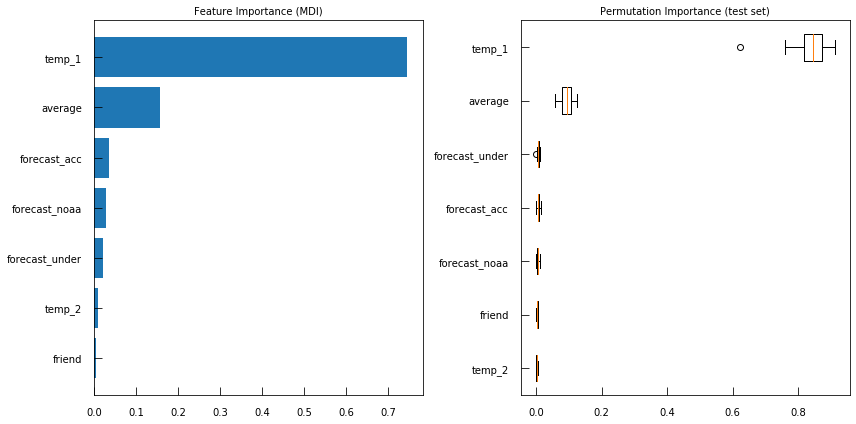

In [10]:
from sklearn.inspection import permutation_importance

feature_importance = w
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(list(X.columns))[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)

result = permutation_importance(RF, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(list(X.columns))[sorted_idx])
plt.title("Permutation Importance (test set)",fontsize=10)
fig.tight_layout()
plt.show()


Using forecast here is a bit stupid... Let's retrain the model without those

## Smaller and better features sets

In [11]:
from sklearn.ensemble import RandomForestRegressor

y = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop(['Unnamed: 0', 'year', 'month', 'day',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                                           random_state = 42)

grid_values = {'criterion': ['mse'],
               'n_estimators':np.arange(600,1200,300), 
               'max_depth':np.arange(2,22,5),
               'min_samples_split':np.arange(2,20,4),
              'min_samples_leaf':np.arange(1,20,4)}# define the hyperparameters you want to test
#with the range over which you want it to be tested.

grid_tree_acc = GridSearchCV(RandomForestRegressor(), param_grid = grid_values, scoring='r2',n_jobs=-1)#Feed it to the GridSearchCV with the right
#score over which the decision should be taken

grid_tree_acc.fit(X_train, y_train)

y_decision_fn_scores_acc=grid_tree_acc.score(X_test,y_test)

print('Grid best parameter (max. r2): ', grid_tree_acc.best_params_)#get the best parameters
print('Grid best score (r2): ', grid_tree_acc.best_score_)#get the best score calculated from the train/validation
#dataset
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric

Grid best parameter (max. r2):  {'criterion': 'mse', 'max_depth': 17, 'min_samples_leaf': 13, 'min_samples_split': 14, 'n_estimators': 600}
Grid best score (r2):  0.8226222127844982
Grid best parameter (max. r2) model on test:  0.8401017759622916


In [12]:
RF = RandomForestRegressor(criterion=grid_tree_acc.best_params_['criterion'],
                              n_estimators=grid_tree_acc.best_params_['n_estimators'],
                             max_depth=grid_tree_acc.best_params_['max_depth'],
                             min_samples_leaf=grid_tree_acc.best_params_['min_samples_leaf'],
                             min_samples_split=grid_tree_acc.best_params_['min_samples_split'])
RF.fit(X_train, y_train)


w=RF.feature_importances_#get the weights

sorted_features=sorted([[list(X.columns)[i],abs(w[i])] for i in range(len(w))],key=itemgetter(1),reverse=True)

print('Features sorted per importance in discriminative process')
print(sorted_features)

Features sorted per importance in discriminative process
[['temp_1', 0.7866909112692401], ['average', 0.19878775227348522], ['temp_2', 0.009538755928935907], ['friend', 0.00498258052833879]]


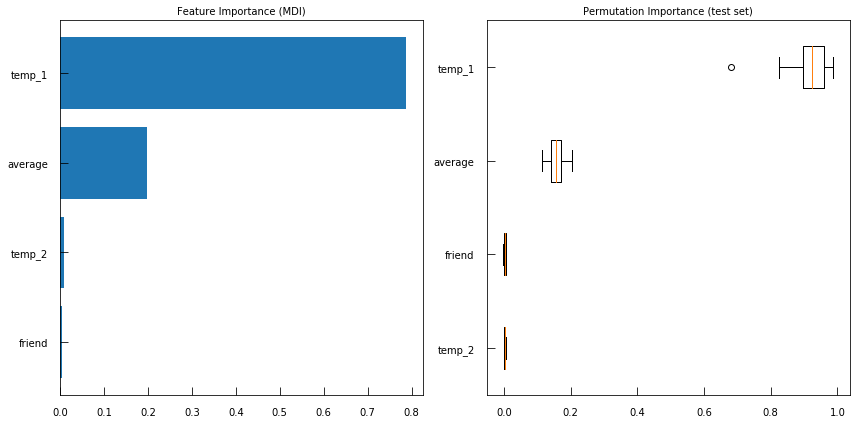

In [13]:
from sklearn.inspection import permutation_importance

feature_importance = w
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(list(X.columns))[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)

result = permutation_importance(RF, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(list(X.columns))[sorted_idx])
plt.title("Permutation Importance (test set)",fontsize=10)
fig.tight_layout()
plt.show()

https://hub.packtpub.com/cross-validation-strategies-for-time-series-forecasting-tutorial/

## Our splitting strategy doesn't seem to represent the reality of the process....

Splitting straegy before : randomly picking points. 

More truthfull splitting strategy

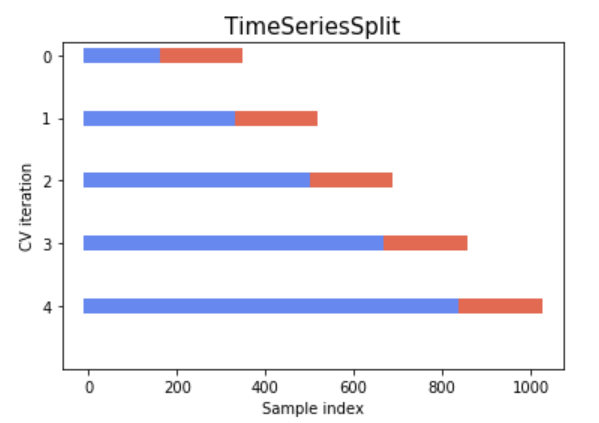

In [23]:
Image('TimeSeriesSplit.png')

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
y = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop(['Unnamed: 0', 'year', 'month', 'day',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'], axis = 1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
print(np.array(X).shape)

X_train=np.array(X)[:int(len(X.index)*0.75),:]                                                                           #random_state = 42)
X_test=np.array(X)[int(len(X.index)*0.75):,:]
y_train=np.array(y)[:int(len(X.index)*0.75)]
y_test=np.array(y)[int(len(X.index)*0.75):]
grid_values = {'criterion': ['mse'],
               'n_estimators':np.arange(600,1200,300), 
               'max_depth':np.arange(2,22,5),
               'min_samples_split':np.arange(2,20,4),
              'min_samples_leaf':np.arange(1,20,4)}# define the hyperparameters you want to test
#with the range over which you want it to be tested.
tscv = TimeSeriesSplit()


    
    
grid_tree_acc = GridSearchCV(RandomForestRegressor(), param_grid = grid_values, scoring='r2',cv=tscv,n_jobs=-1)#Feed it to the GridSearchCV with the right
#score over which the decision should be taken

grid_tree_acc.fit(X_train, y_train)

y_decision_fn_scores_acc=grid_tree_acc.score(X_test,y_test)

print('Grid best parameter (max. r2): ', grid_tree_acc.best_params_)#get the best parameters
print('Grid best score (r2): ', grid_tree_acc.best_score_)#get the best score calculated from the train/validation
#dataset
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric

(348, 4)
Grid best parameter (max. r2):  {'criterion': 'mse', 'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 18, 'n_estimators': 600}
Grid best score (r2):  0.19429974707353015
Grid best parameter (max. r2) model on test:  0.7156096125886222


In [15]:
RF = RandomForestRegressor(criterion=grid_tree_acc.best_params_['criterion'],
                              n_estimators=grid_tree_acc.best_params_['n_estimators'],
                             max_depth=grid_tree_acc.best_params_['max_depth'],
                             min_samples_leaf=grid_tree_acc.best_params_['min_samples_leaf'],
                             min_samples_split=grid_tree_acc.best_params_['min_samples_split'])
RF.fit(X_train, y_train)


w=RF.feature_importances_#get the weights

sorted_features=sorted([[list(X.columns)[i],abs(w[i])] for i in range(len(w))],key=itemgetter(1),reverse=True)

print('Features sorted per importance in discriminative process')
print(sorted_features)

Features sorted per importance in discriminative process
[['temp_1', 0.605969978367495], ['average', 0.35279788603505696], ['friend', 0.023945300370289368], ['temp_2', 0.017286835227158723]]


In [16]:
RF.score(X_train, y_train)

0.8925721487366025

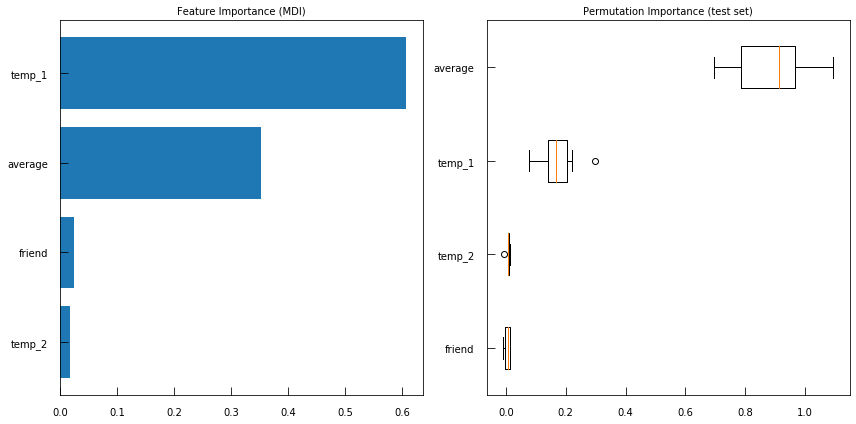

In [17]:
from sklearn.inspection import permutation_importance

feature_importance = w
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(list(X.columns))[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)

result = permutation_importance(RF, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(list(X.columns))[sorted_idx])
plt.title("Permutation Importance (test set)",fontsize=10)
fig.tight_layout()
plt.show()

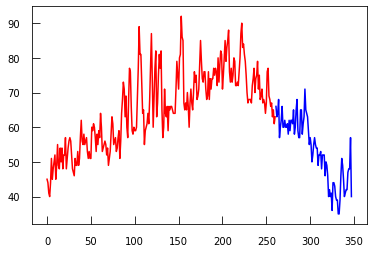

In [18]:
plt.plot(np.arange(len(X.index))[:int(len(X.index)*0.75)],y_train,'r')
plt.plot(np.arange(len(X.index))[int(len(X.index)*0.75):],y_test,'b')
plt.show()

Text(0.5, 1.0, '0.9425713017143356')

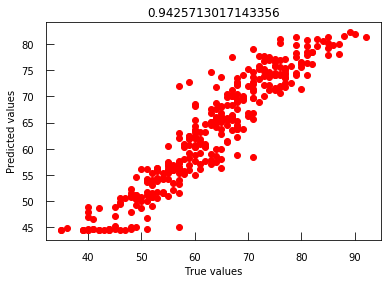

In [19]:
plt.plot(y,RF.predict(X),'ro')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title(str(sc.stats.pearsonr(y,RF.predict(X))[0]))

Text(0.5, 1.0, '0.8483653774165267')

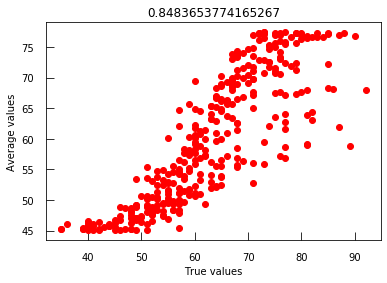

In [20]:
plt.plot(y,features.average,'ro')
plt.xlabel('True values')
plt.ylabel('Average values')
plt.title(str(sc.stats.pearsonr(y,features.average)[0]))

## Even better splitting

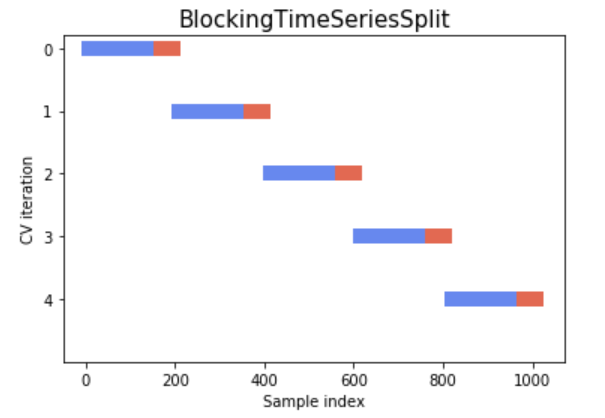

In [24]:
Image('BlockedTimeSeriesSplit.png')

In [25]:
class BlockingTimeSeriesSplit():
    def __init__(self, n_splits):
        self.n_splits = n_splits
    
    def get_n_splits(self, X, y, groups):
        return self.n_splits
    
    def split(self, X, y=None, groups=None):
        n_samples = len(X)
        k_fold_size = n_samples // self.n_splits
        indices = np.arange(n_samples)

        margin = 0
        for i in range(self.n_splits):
            start = i * k_fold_size
            stop = start + k_fold_size
            mid = int(0.8 * (stop - start)) + start
            yield indices[start: mid], indices[mid + margin: stop]

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
y = np.array(features['actual'])

# Remove the labels from the features
# axis 1 refers to the columns
X= features.drop(['Unnamed: 0', 'year', 'month', 'day',
       'actual', 'forecast_noaa', 'forecast_acc', 'forecast_under',
       'week_Fri', 'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs',
       'week_Tues', 'week_Wed'], axis = 1)

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
print(np.array(X).shape)

X_train=np.array(X)[:int(len(X.index)*0.75),:]                                                                           #random_state = 42)
X_test=np.array(X)[int(len(X.index)*0.75):,:]
y_train=np.array(y)[:int(len(X.index)*0.75)]
y_test=np.array(y)[int(len(X.index)*0.75):]
grid_values = {'criterion': ['mse'],
               'n_estimators':np.arange(600,1200,300), 
               'max_depth':np.arange(2,22,5),
               'min_samples_split':np.arange(2,20,4),
              'min_samples_leaf':np.arange(1,20,4)}# define the hyperparameters you want to test
#with the range over which you want it to be tested.
tscv = BlockingTimeSeriesSplit(n_splits=5)


    
    
grid_tree_acc = GridSearchCV(RandomForestRegressor(), param_grid = grid_values, scoring='r2',cv=tscv, n_jobs=-1)#Feed it to the GridSearchCV with the right
#score over which the decision should be taken

grid_tree_acc.fit(X_train, y_train)

y_decision_fn_scores_acc=grid_tree_acc.score(X_test,y_test)

print('Grid best parameter (max. r2): ', grid_tree_acc.best_params_)#get the best parameters
print('Grid best score (r2): ', grid_tree_acc.best_score_)#get the best score calculated from the train/validation
#dataset
print('Grid best parameter (max. r2) model on test: ', y_decision_fn_scores_acc)# get the equivalent score on the test
#dataset : again this is the important metric

(348, 4)
Grid best parameter (max. r2):  {'criterion': 'mse', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 600}
Grid best score (r2):  -0.09477697229833112
Grid best parameter (max. r2) model on test:  0.7142209845433607


In [27]:
RF = RandomForestRegressor(criterion=grid_tree_acc.best_params_['criterion'],
                              n_estimators=grid_tree_acc.best_params_['n_estimators'],
                             max_depth=grid_tree_acc.best_params_['max_depth'],
                             min_samples_leaf=grid_tree_acc.best_params_['min_samples_leaf'],
                             min_samples_split=grid_tree_acc.best_params_['min_samples_split'])
RF.fit(X_train, y_train)


w=RF.feature_importances_#get the weights

sorted_features=sorted([[list(X.columns)[i],abs(w[i])] for i in range(len(w))],key=itemgetter(1),reverse=True)

print('Features sorted per importance in discriminative process')
print(sorted_features)

Features sorted per importance in discriminative process
[['temp_1', 0.586979726778727], ['average', 0.3520133061284788], ['friend', 0.034259419061736934], ['temp_2', 0.02674754803105722]]


In [28]:
RF.score(X_train, y_train)

0.9261454298630611

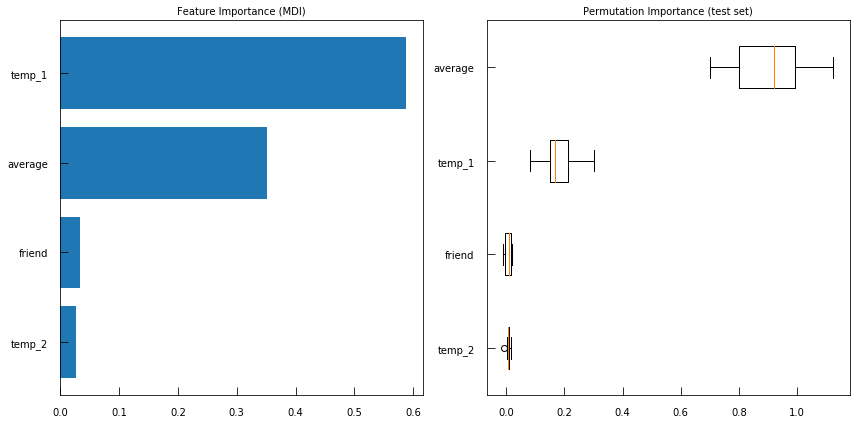

In [29]:
from sklearn.inspection import permutation_importance

feature_importance = w
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(list(X.columns))[sorted_idx])
plt.title('Feature Importance (MDI)',fontsize=10)

result = permutation_importance(RF, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(list(X.columns))[sorted_idx])
plt.title("Permutation Importance (test set)",fontsize=10)
fig.tight_layout()
plt.show()

Text(0.5, 1.0, '0.9542265533853918')

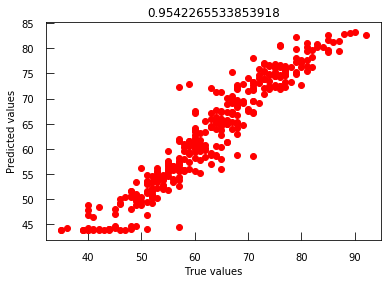

In [30]:
plt.plot(y,RF.predict(X),'ro')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title(str(sc.stats.pearsonr(y,RF.predict(X))[0]))

Text(0.5, 1.0, '0.8483653774165267')

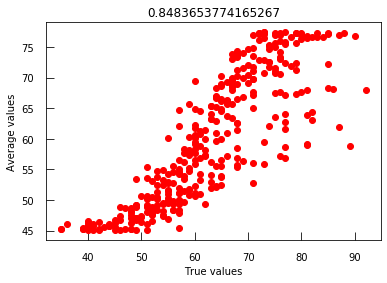

In [31]:
plt.plot(y,features.average,'ro')
plt.xlabel('True values')
plt.ylabel('Average values')
plt.title(str(sc.stats.pearsonr(y,features.average)[0]))